In [6]:
import sys
sys.path.append('/quyennt/sexy/')

In [11]:
# from timm.data.auto_augment import rand_augment_transform
from auto_augment import rand_augment_transform
from PIL import Image
from matplotlib import pyplot as plt
from glob import glob

tfm = rand_augment_transform(
    config_str='rand-m9-n2', 
    hparams={}
)

[AugmentOp(name=AutoContrast, p=0.5, m=9, mstd=0), AugmentOp(name=Equalize, p=0.5, m=9, mstd=0), AugmentOp(name=Invert, p=0.5, m=9, mstd=0), AugmentOp(name=Rotate, p=0.5, m=9, mstd=0), AugmentOp(name=Posterize, p=0.5, m=9, mstd=0), AugmentOp(name=Solarize, p=0.5, m=9, mstd=0), AugmentOp(name=SolarizeAdd, p=0.5, m=9, mstd=0), AugmentOp(name=Color, p=0.5, m=9, mstd=0), AugmentOp(name=Contrast, p=0.5, m=9, mstd=0), AugmentOp(name=Brightness, p=0.5, m=9, mstd=0), AugmentOp(name=Sharpness, p=0.5, m=9, mstd=0), AugmentOp(name=ShearX, p=0.5, m=9, mstd=0), AugmentOp(name=ShearY, p=0.5, m=9, mstd=0), AugmentOp(name=TranslateXRel, p=0.5, m=9, mstd=0), AugmentOp(name=TranslateYRel, p=0.5, m=9, mstd=0)] None


In [8]:
from torchvision import transforms
import torchvision.transforms.functional as F
import numpy as np
class SquarePad:
    def __call__(self, image):
        w, h = image.size
        max_wh = np.max([w, h])
        hp = int((max_wh - w) / 2)
        vp = int((max_wh - h) / 2)
        padding = (hp, vp, hp, vp)
        return F.pad(image, padding, (128, 128, 128), 'constant')
a = transforms.Compose([
            SquarePad(),
            transforms.Resize(256),
            transforms.CenterCrop(224),   
        ])
a.transforms.insert(0, tfm)

/root/miniconda3/envs/sexy/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


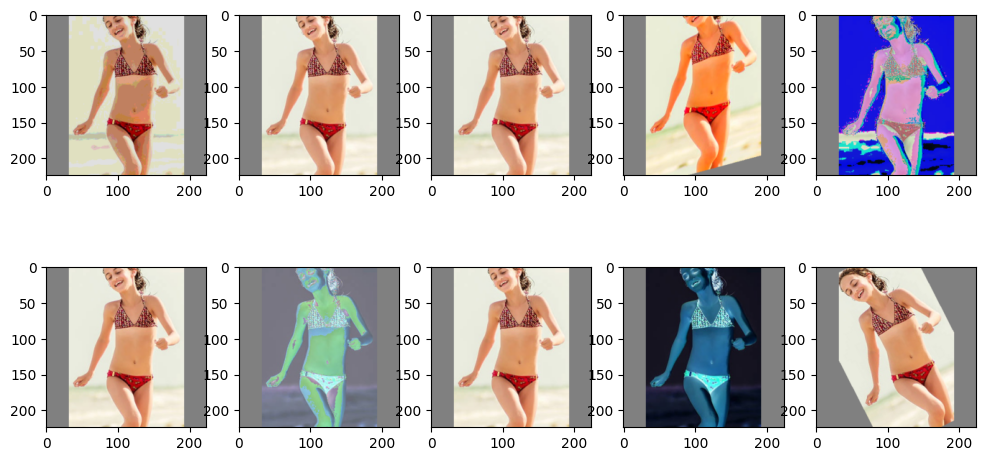

In [10]:
import random
lst = glob("/quyennt/sexy/data/data_0/val/bikini/*.jpg")
index = random.randint(0, len(lst))
x   = Image.open(lst[index])
fig, axs = plt.subplots(2, 5, figsize=(12,6))
row, col = 0, 0
for _ in range(10):
    axs[row, col].imshow(a(x))
    col+=1
    if col==5:
        col=0
        row=1
plt.show()

In [167]:
a

Compose(
    RandAugment(n=2, ops=
	AugmentOp(name=AutoContrast, p=0.5, m=9, mstd=0)
	AugmentOp(name=Equalize, p=0.5, m=9, mstd=0)
	AugmentOp(name=Invert, p=0.5, m=9, mstd=0)
	AugmentOp(name=Rotate, p=0.5, m=9, mstd=0)
	AugmentOp(name=Posterize, p=0.5, m=9, mstd=0)
	AugmentOp(name=Solarize, p=0.5, m=9, mstd=0)
	AugmentOp(name=SolarizeAdd, p=0.5, m=9, mstd=0)
	AugmentOp(name=Color, p=0.5, m=9, mstd=0)
	AugmentOp(name=Contrast, p=0.5, m=9, mstd=0)
	AugmentOp(name=Brightness, p=0.5, m=9, mstd=0)
	AugmentOp(name=Sharpness, p=0.5, m=9, mstd=0)
	AugmentOp(name=ShearX, p=0.5, m=9, mstd=0)
	AugmentOp(name=ShearY, p=0.5, m=9, mstd=0)
	AugmentOp(name=TranslateXRel, p=0.5, m=9, mstd=0)
	AugmentOp(name=TranslateYRel, p=0.5, m=9, mstd=0))
    Resize(size=256, interpolation=bilinear, max_size=None, antialias=None)
    CenterCrop(size=(224, 224))
)